In [ ]:
!pip install minisom

In [ ]:
!pip install yfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure  prefix=/usr
!make
!make install
!pip install Ta-Lib

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# SOM & Sklearn library
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader as pdr
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from pandas_datareader.famafrench import get_available_datasets

import talib

results_path = Path('results', 'lstm_time_series')
if not results_path.exists():
    results_path.mkdir(parents=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[Close    845.761484
dtype: float64, Close    18.560864
dtype: float64, Close    16.136104
dtype: float64]
     Company  ...                                 CHG
0      GOOGL  ...  Close    845.761484
dtype: float64
1       Gold  ...   Close    18.560864
dtype: float64
2  Crude Oil  ...   Close    16.136104
dtype: float64

[3 rows x 3 columns]
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.017205221131468208
4 0 GOOGL
0 3 Gold
0 4 Crude Oil


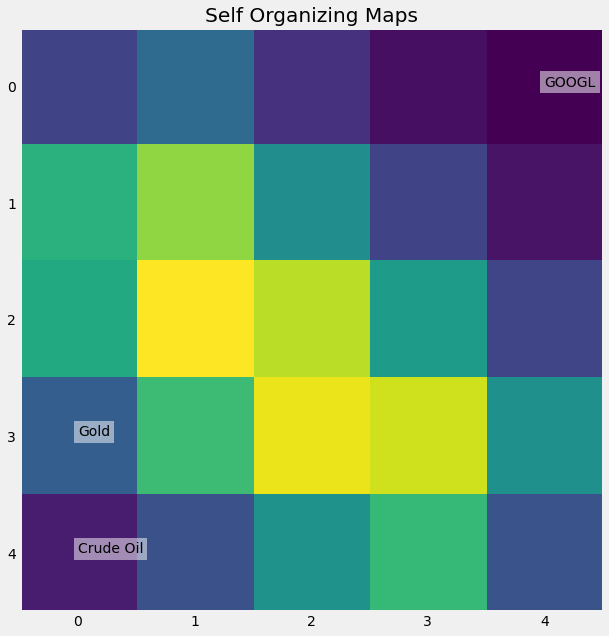

In [ ]:
df_google = pdr.get_data_yahoo("GOOGL", start="2017-01-01", end="2017-04-30")

df_gold = pdr.get_data_yahoo("Gold", start="2017-01-01", end="2017-04-30")
df_oil = pdr.get_data_yahoo("Oil", start="2017-01-01", end="2017-04-30")

df_google['ATR-9'] = talib.ATR(df_google["High"],df_google["Low"],df_google["Close"], timeperiod=9)
df_gold['ATR-9'] = talib.ATR(df_gold["High"],df_gold["Low"],df_gold["Close"], timeperiod=9)
df_oil['ATR-9'] = talib.ATR(df_oil["High"],df_oil["Low"],df_oil["Close"], timeperiod=9)

# df_google['ATR-9'] = talib.ATR(df_google["High"],df_google["Low"],df_google["Close"], timeperiod=9)
# df_gold['ATR-9'] = talib.ATR(df_gold["High"],df_gold["Low"],df_gold["Close"], timeperiod=9)
# df_oil['ATR-9'] = talib.ATR(df_oil["High"],df_oil["Low"],df_oil["Close"], timeperiod=9)

df_google.dropna()
df_gold.dropna()
df_oil.dropna()

df_google_atr_mean = df_google[['ATR-9']].mean()
df_gold_atr_mean = df_gold[['ATR-9']].mean()
df_oil_atr_mean = df_oil[['ATR-9']].mean()

df_google_close_mean = df_google[['Close']].mean()
df_gold_close_mean = df_gold[['Close']].mean()
df_oil_close_mean = df_oil[['Close']].mean()



companies_name = ['GOOGL','Gold','Crude Oil']
atr_mean_arr = [df_google_atr_mean,df_gold_atr_mean,df_oil_atr_mean]

close_mean_arr = [df_google_close_mean, df_gold_close_mean, df_oil_close_mean]
print(close_mean_arr)
df = pd.DataFrame({'Company':companies_name,
                  'ATR':atr_mean_arr,
                  'CHG':close_mean_arr
                  })
# .sort_values(by=['ATR'], axis = 1)

# df = df.reset_index(drop=True)
print(df)
X = df[['ATR','CHG']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Initialize a 15x15 SOM
som = MiniSom(5, 5, 2, learning_rate=0.5, sigma=5, random_seed=42)

# Initialize with randon weights
som.random_weights_init(X)

# Trains SOM with 10000 iterations
som.train_batch(X,10000, verbose=True)

# Plot SOM
plt.figure(figsize=(20, 10))
for ix in range(len(X)):
    winner = som.winner(X[ix])
    plt.text(winner[0], winner[1], df.Company[ix], bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.imshow(som.distance_map())
plt.grid(False)
plt.title('Self Organizing Maps');


# List the corresponding companies
for ix in range(len(X)):
    winner = som.winner(X[ix])
    print(winner[0], winner[1], df['Company'][ix])


#Conclusion
##As can be seen from the picture, gold has a  positive correlation with oil and has a negative correlation with The stock of Google.


